In [45]:
import numpy as np
from numpy.random import seed
np.random.seed(0)

import pandas as pd

import seaborn as sns
sns.set_context('notebook')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.style.use('classic')
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import statistics
from scipy import stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import ks_2samp

rng = np.random.default_rng()
from sklearn.metrics.pairwise import cosine_similarity

from datetime import datetime

from skimage import io
from PIL import Image

In [46]:
df_whole = pd.read_csv('../../PrimaryDataset/mobile_preproccessed_whole_dataset.csv')
df_sim = pd.read_csv('../../PreProcessedData/Mobile/Mobile_final_sim.csv')
df_dissim = pd.read_csv('../../PreProcessedData/Mobile/Mobile_final_dis.csv')

print('Dimensions of Whole Dataset: ', df_whole.shape)
print('Dimensions of Textually Similar Dataset: ', df_sim.shape)
print('Dimensions of Dataset: ', df_dissim.shape)

Dimensions of Whole Dataset:  (5320, 12)
Dimensions of Textually Similar Dataset:  (122, 15)
Dimensions of Dataset:  (131, 15)


# Statistics of Datasets

In [47]:
#To Describe Length of 'Description' of the Bugs
df_desc = pd.DataFrame()
df_desc['Whole'] = df_whole[['Description']].apply(lambda col: col.str.len().describe())
df_desc['Textually Similar'] = df_sim[['Description']].apply(lambda col: col.str.len().describe())
df_desc['Textually Disimilar'] = df_dissim[['Description']].apply(lambda col: col.str.len().describe())

#To show results
df_desc

,Whole,Textually Similar,Textually Disimilar
count,5320.000000,122.000000,131.000000
mean,1133.866353,8362.959016,322.519084
std,3278.740604,8358.459626,592.817060
min,1.000000,648.000000,18.000000
25%,163.000000,3283.000000,83.000000
50%,321.000000,7305.000000,134.000000
75%,603.250000,9004.750000,255.500000
max,41226.000000,41226.000000,3401.000000


# Skewness and Kurt of Textually Similar/Dissimilar Dataset

In [48]:
df_dict = {'Dataset':[], 'Skewness':[], 'Kurt':[], 'Mean':[], 'Median':[], 'Standard Deviation':[]}
df_cos = pd.DataFrame(df_dict)

df_sim_cos = df_sim["Average_Cos_Similarity_Score"];
skewness_sim = df_sim_cos.skew();
kurt_sim = df_sim_cos.kurt();
mean_sim = df_sim_cos.mean()
median_sim = df_sim_cos.median()
std_sim = df_sim_cos.std()

df_dissim_cos = df_dissim["Average_Cos_Similarity_Score"];
skewness_dissim = df_dissim_cos.skew();
kurt_dissim = df_dissim_cos.kurt();
mean_dissim = df_dissim_cos.mean()
median_dissim = df_dissim_cos.median()
std_dissim = df_dissim_cos.std()

df_cos.loc[len(df_cos.index)] = ['Textually Similar', round(skewness_sim,2), round(kurt_sim,2), 
                                 round(mean_sim,2), round(median_sim,2), round(std_sim,2)]
df_cos.loc[len(df_cos.index)] = ['Textually Dissimilar', round(skewness_dissim,2), round(kurt_dissim,2), 
                                 round(mean_dissim,2), round(median_dissim,2), round(std_dissim,2)]

#To show results
df_cos

,Dataset,Skewness,Kurt,Mean,Median,Standard Deviation
0,Textually Similar,-0.83,-0.64,0.16,0.17,0.03
1,Textually Dissimilar,-0.37,-0.60,0.03,0.03,0.01


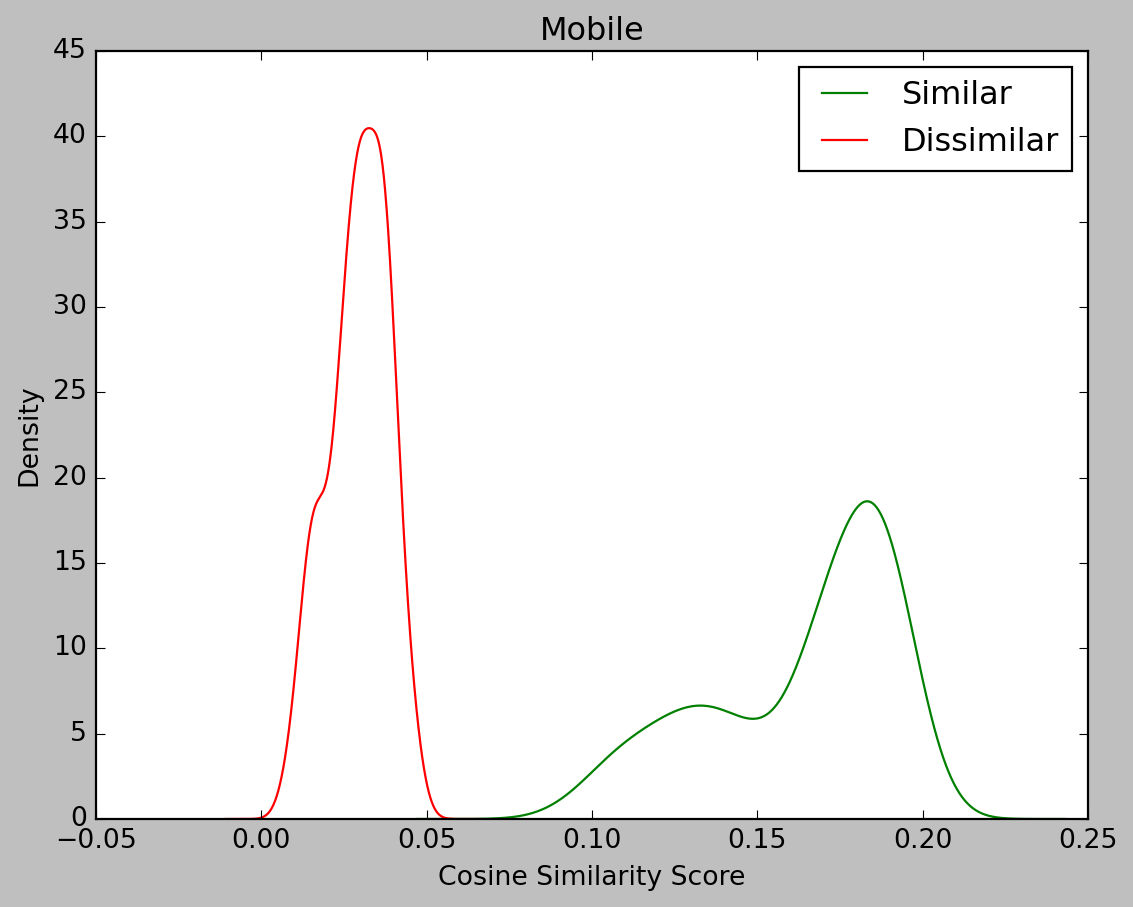

In [49]:
#To Plot Graph
ax = plt.axes()
x = df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
y = df_dissim.Average_Cos_Similarity_Score.plot.density(color='red')

ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Density')
ax.set_title('Mobile')

plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()

# Cosine Similarity Score Difference

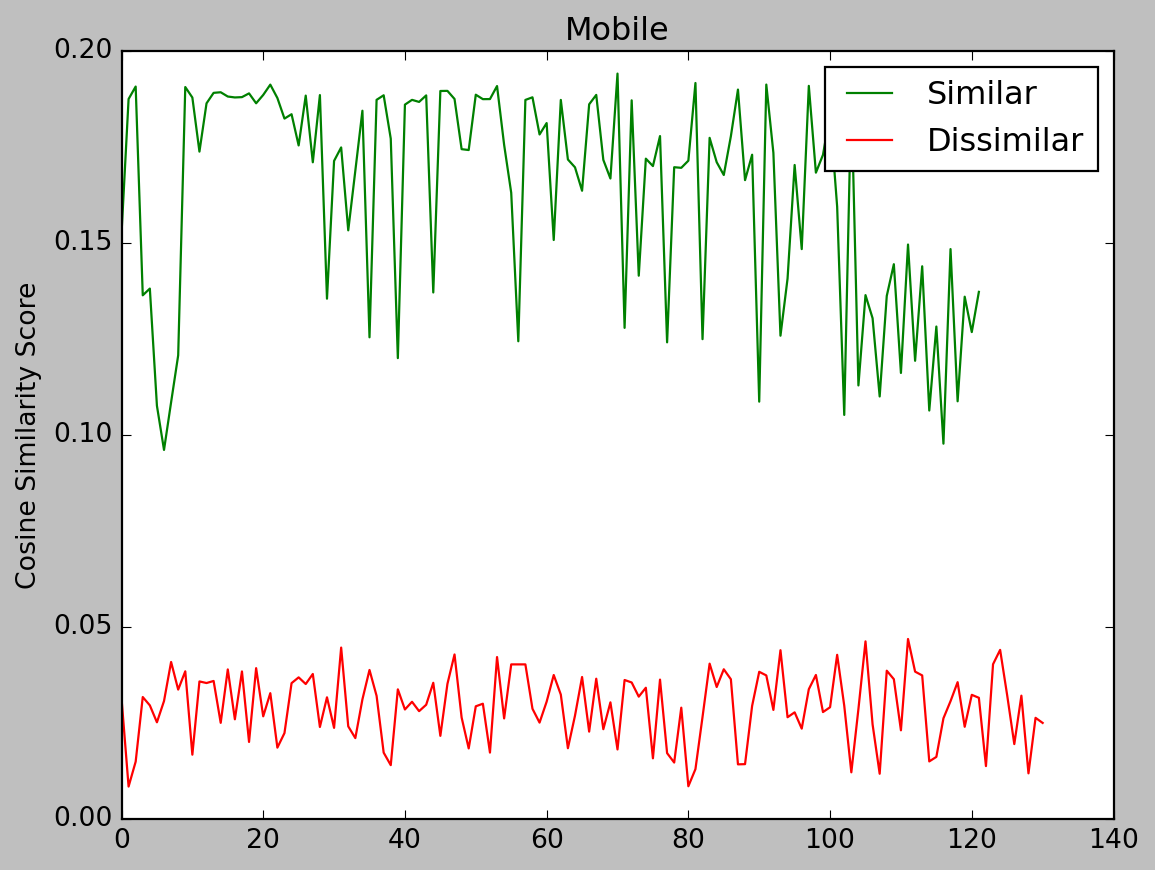

In [50]:
df_sim["Average_Cos_Similarity_Score"].plot(color='green')
df_dissim["Average_Cos_Similarity_Score"].plot(color='red')

plt.ylabel('Cosine Similarity Score')
plt.title('Mobile')

plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()